Generation = 1
Fitness    = 0.12726578253383666
Generation = 2
Fitness    = 0.12726578253383666
Generation = 3
Fitness    = 0.12726578253383666
Generation = 4
Fitness    = 0.12726578253383666
Generation = 5
Fitness    = 0.12726578253383666
Generation = 6
Fitness    = 0.12726578253383666
Generation = 7
Fitness    = 0.12726578253383666
Generation = 8
Fitness    = 0.12726578253383666
Generation = 9
Fitness    = 0.12726578253383666
Generation = 10
Fitness    = 0.12726578253383666
Generation = 11
Fitness    = 0.12726578253383666
Generation = 12
Fitness    = 0.12726578253383666
Generation = 13
Fitness    = 0.12726578253383666
Generation = 14
Fitness    = 0.12726578253383666
Generation = 15
Fitness    = 0.12726578253383666
Generation = 16
Fitness    = 0.12726578253383666
Generation = 17
Fitness    = 0.12783151876848706
Generation = 18
Fitness    = 0.12783151876848706
Generation = 19
Fitness    = 0.12783151876848706
Generation = 20
Fitness    = 0.24816827865296093
Generation = 21
Fitness    = 

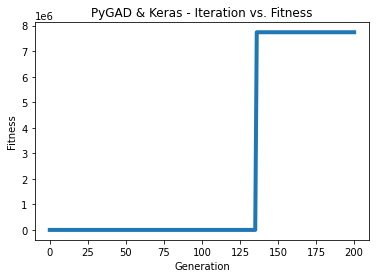

Fitness value of the best solution = 7739380.763515218
Index of the best solution : 0
Categorical Crossentropy :  1.192093e-07
Accuracy :  1.0


In [3]:
import tensorflow.keras
import pygad.kerasga
import numpy
import pygad

def fitness_func(solution, sol_idx):
    global data_inputs, data_outputs, keras_ga, model

    model_weights_matrix = pygad.kerasga.model_weights_as_matrix(model=model,
                                                                 weights_vector=solution)

    model.set_weights(weights=model_weights_matrix)

    predictions = model.predict(data_inputs)

    cce = tensorflow.keras.losses.CategoricalCrossentropy()
    solution_fitness = 1.0 / (cce(data_outputs, predictions).numpy() + 0.00000001)

    return solution_fitness

def callback_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))

# Build the keras model using the functional API.
input_layer = tensorflow.keras.layers.Input(shape=(100, 100, 3))
conv_layer1 = tensorflow.keras.layers.Conv2D(filters=5,
                                             kernel_size=7,
                                             activation="relu")(input_layer)
max_pool1 = tensorflow.keras.layers.MaxPooling2D(pool_size=(5,5),
                                                 strides=5)(conv_layer1)
conv_layer2 = tensorflow.keras.layers.Conv2D(filters=3,
                                             kernel_size=3,
                                             activation="relu")(max_pool1)
flatten_layer  = tensorflow.keras.layers.Flatten()(conv_layer2)
dense_layer = tensorflow.keras.layers.Dense(15, activation="relu")(flatten_layer)
output_layer = tensorflow.keras.layers.Dense(4, activation="softmax")(dense_layer)

model = tensorflow.keras.Model(inputs=input_layer, outputs=output_layer)

keras_ga = pygad.kerasga.KerasGA(model=model,
                                 num_solutions=10)

# Data inputs
data_inputs = numpy.load("dataset_inputs.npy")

# Data outputs
data_outputs = numpy.load("dataset_outputs.npy")
data_outputs = tensorflow.keras.utils.to_categorical(data_outputs)

num_generations = 200
num_parents_mating = 5
initial_population = keras_ga.population_weights

ga_instance = pygad.GA(num_generations=num_generations, 
                       num_parents_mating=num_parents_mating, 
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       on_generation=callback_generation)

ga_instance.run()

ga_instance.plot_result(title="PyGAD & Keras - Iteration vs. Fitness", linewidth=4)

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

# Fetch the parameters of the best solution.
best_solution_weights = pygad.kerasga.model_weights_as_matrix(model=model,
                                                              weights_vector=solution)
model.set_weights(best_solution_weights)
predictions = model.predict(data_inputs)
# print("Predictions : \n", predictions)

# Calculate the categorical crossentropy for the trained model.
cce = tensorflow.keras.losses.CategoricalCrossentropy()
print("Categorical Crossentropy : ", cce(data_outputs, predictions).numpy())

# Calculate the classification accuracy for the trained model.
ca = tensorflow.keras.metrics.CategoricalAccuracy()
ca.update_state(data_outputs, predictions)
accuracy = ca.result().numpy()
print("Accuracy : ", accuracy)